<h1><b>MLFlow: Unified Platform for Experiment Tracking and Model Registry</b></h1>

<h2><b>Sentiment Analysis of Real-time Flipkart Product Reviews</b></h2>

<b>Objective</b><br>
The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.

In [4]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Loading the Dataset

    # Badminton Dataset
df = pd.read_csv('reviews_badminton\data.csv')
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [6]:
#Shape

print("Dataset Shape : ", df.shape)

Dataset Shape :  (8518, 8)


In [7]:
# Dataset Columns

print(df.columns)

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')


For the selected input features, 'r_text' and 'r_title', and the output feature 'ratings' (Sentiment label), the choice was made to focus specifically on the textual content of the reviews ('r_text') as they contain the primary information about the sentiments expressed by the customers. 

- 'r_name' & 'r_title': The reviewer's name may not directly contribute to sentiment analysis as the focus is on the content of the review rather than the identity of the reviewer.

- 'r_place' and 'r_date': These columns represent the place and date of the review, respectively. While they may provide contextual information, they are not directly related to sentiment analysis. The sentiment expressed in a review is generally independent of the location or time at which it was written.

- 'up_votes' and 'down_votes': These columns represent the popularity or reception of a review, rather than its sentiment. Including them in the input features may introduce noise or unnecessary complexity to the model, as they are not directly related to the sentiment classification task.

Therefore, for the specific objective of classifying customer reviews as positive or negative (satisfaction or dissatisfaction) based on their textual content, it was decided to focus solely on the 'r_text' and 'r_title' columns as input features, while using the 'rating' column as the output feature (Sentiment label) for model training and evaluation.

In [8]:
# Dropping the columns
df.drop(columns=['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes', 'Down Votes', 'Month'], inplace=True)

df.head()

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [9]:
# Check for null values
null_values = df.isnull().sum()

# Display null values count
print(null_values)

Review text    8
Ratings        0
dtype: int64


In [10]:
# Remove all rows with NaN values
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Review text    0
Ratings        0
dtype: int64

In [12]:
# Output sentiment labels

# Define threshold for positive/negative ratings
threshold = 4

# Create sentiment labels
df['Ratings'] = df['Ratings'].apply(lambda x: 'Positive' if x >= threshold else 'Negative')

df['Ratings']

0       Positive
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
8505    Negative
8506    Positive
8507    Positive
8508    Positive
8509    Negative
Name: Ratings, Length: 8510, dtype: object

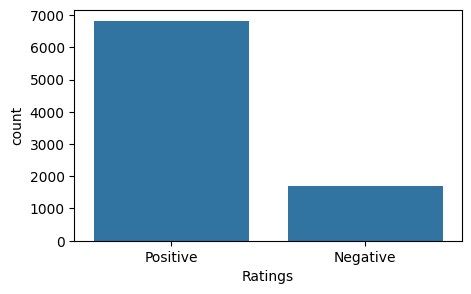

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3)) 
sns.countplot(x='Ratings', data=df)
plt.show()

In [14]:
# Remove 'READ MORE' from 'Review' column
df['Review text'] = df['Review text'].str.replace('READ MORE', '')

In [15]:
# Cleaned Dataset

df.head()

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",Positive
1,They didn't supplied Yonex Mavis 350. Outside ...,Negative
2,Worst product. Damaged shuttlecocks packed in ...,Negative
3,"Quite O. K. , but nowadays the quality of the...",Negative
4,Over pricedJust â?¹620 ..from retailer.I didn'...,Negative


<h4><b>Identify Input and Output</b></h4>

In [16]:
# Input - X

X = df['Review text']

X.shape

(8510,)

In [17]:
# Output - Y

y = df['Ratings']

y.shape

(8510,)

<h4><b>Split the data into train and test</b></h4>

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

print("X_train shape :", X_train.shape, y_train.shape)
print("X_test shape :", X_test.shape, y_test.shape)

print("\ny_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape : (6382,) (6382,)
X_test shape : (2128,) (2128,)

y_train shape : (6382,)
y_test shape : (2128,)


<h4><b>Data Preprocessing & Cleaning on X_train Data</b></h4>

In [19]:
# importing Libraries

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [20]:
# Text Cleaning: Remove special characters, punctuation, stopwords, and convert text to lowercase

def preprocess(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

In [21]:
X_train.head()

2563                                                 Good
6       BEST PURCHASE It is a good quality and is more...
2804                                 Good quality product
783                                                 Super
3594                                     Too good to play
Name: Review text, dtype: object

In [22]:
# Apply preprocess function to 'r_text' column of X_train
X_train_clean = X_train.apply(preprocess)

X_train_clean

2563                                                 good
6       best purchase good quality durable average shu...
2804                                 good quality product
783                                                 super
3594                                            good play
                              ...                        
4373                                            excellent
7891                                         good product
4859                                            excellent
3264                                                 good
2732    low quality product one shuttle start tearing ...
Name: Review text, Length: 6382, dtype: object

<h4><b>Data Preprocessing & Cleaning on X_test Data</b></h4>

In [23]:
X_test.head()

651                  Very bad
3121             Good Product
6565                     Good
882     Best product must buy
3233               Superb..👍👍
Name: Review text, dtype: object

In [24]:
# Apply preprocess function to 'r_text' column of X_train
X_test_clean = X_test.apply(preprocess)

X_test_clean

651                                                   bad
3121                                         good product
6565                                                 good
882                                 best product must buy
3233                                               superb
                              ...                        
1520                              bad goodaverage product
2894                                                  bad
4443                        good quality reasonable price
4117    delivery done super fast price keep increasing...
3987                                         good product
Name: Review text, Length: 2128, dtype: object

<h2><b>Integrate MLflow</b></h2>

<h3><b>MLFlow UI</b></h3>

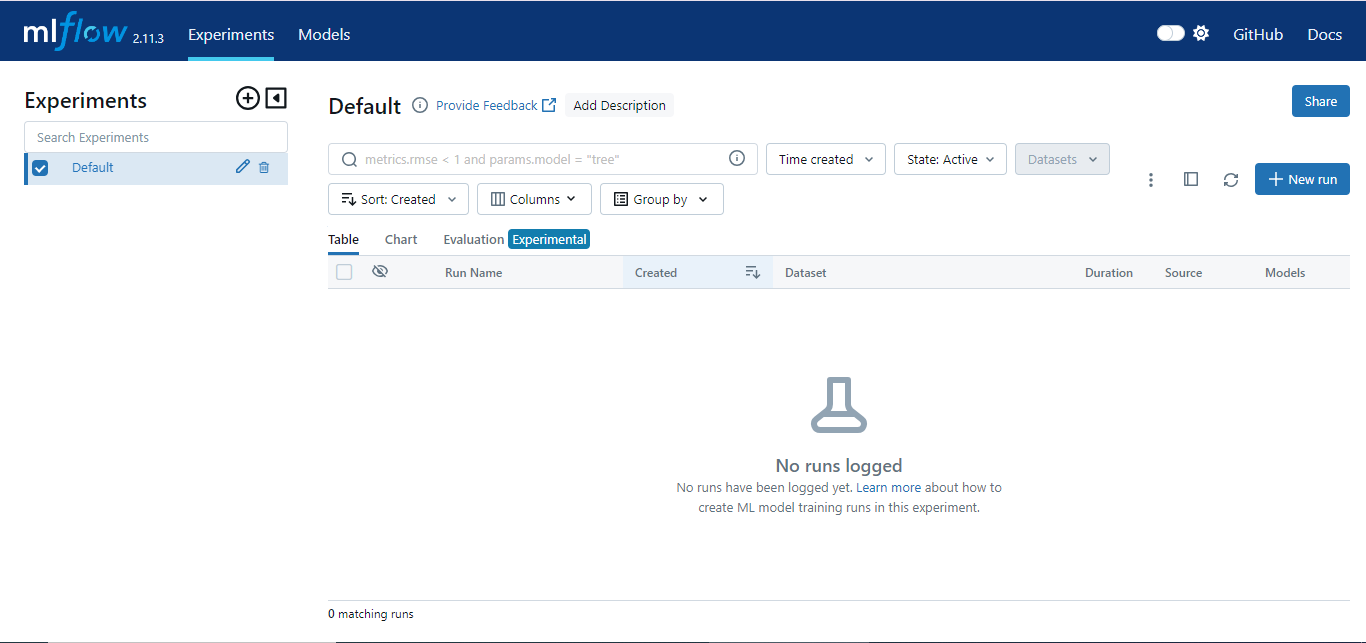

In [25]:
from IPython.display import Image

Image('screen/mlflow ui.png')

In [26]:
# Importing MLFlow and set the experiment name

import mlflow

mlflow.set_experiment("Sentiment_Analysis")

<Experiment: artifact_location='file:///c:/Users/HP/Desktop/Internship_jan_2024/Machine%20Learning/MLFlow%20Sentiment%20Analysis/mlruns/741779103060803797', creation_time=1711185182261, experiment_id='741779103060803797', last_update_time=1711185182261, lifecycle_stage='active', name='Sentiment_Analysis', tags={}>

<h2><b>Added Experiment Name in MLFlow UI</b></h2>

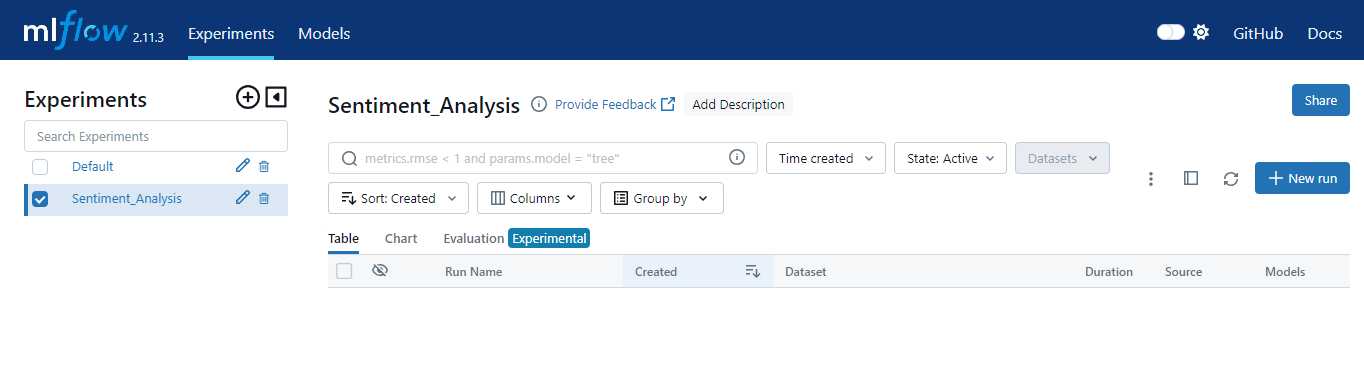

In [27]:
Image('screen/e name.png')

<h2><b>Logging All Experiment Runs using MLFlow</b></h2>

In [28]:
# Ignoring the Warnings

import warnings

warnings.filterwarnings('ignore')

In [29]:
#Importing Library

import joblib
from joblib import Memory

# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

In [42]:
#Importing Libraries

    #Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

    #ML Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

    #Grid Search
from sklearn.model_selection import GridSearchCV

    #Pipeline
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score, make_scorer

# Define a custom scorer with pos_label='Positive' for F1-score
f1_scorer = make_scorer(f1_score, pos_label='Positive')

In [43]:
# Define pipelines for different algorithms
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'knn': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory),
    'svc': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ], memory=memory),
    #'random_forest': Pipeline([
        #('vectorization', CountVectorizer()),
        #('classifier', RandomForestClassifier())
    #], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__alpha': [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'knn': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    ],
    'svc': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto']
        }
    ],
    #'random_forest': [
        #{
            #'vectorization': [CountVectorizer(), TfidfVectorizer()],
            #'vectorization__max_features': [1000, 1500, 2000, 5000],
            #'classifier__n_estimators': [50, 100, 200],
            #'classifier__max_depth': [None, 5, 10],
            #'classifier__min_samples_split': [2, 5, 10],
            #'classifier__min_samples_leaf': [1, 2, 4],
            #'classifier__bootstrap': [True, False]
        #}
    #]
}

In [44]:
# Ignoring the Warnings

import warnings

warnings.filterwarnings('ignore')


# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*" * 20, algo, "*" * 20)
    
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=2,
                               scoring=f1_scorer,
                               return_train_score=True,
                               verbose=1
                               )

    #MLFlow auto logger
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    #MLFlow experiment run
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train, y_train)

    best_models[algo] = grid_search.best_estimator_

    train_score = grid_search.best_score_
    test_score = grid_search.score(X_test, y_test)
    print('Train Score:', train_score)
    print('Test Score:', test_score)

******************** naive_bayes ********************


2024/03/24 15:05:36 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logged at level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/03/24 15:05:37 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.

Fitting 2 folds for each of 8 candidates, totalling 16 fits
CPU times: total: 19.1 s
Wall time: 3min
Train Score: 0.9365234543109742
Test Score: 0.9331803842844852
******************** decision_tree ********************


2024/03/24 15:08:38 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 2 folds for each of 24 candidates, totalling 48 fits
CPU times: total: 35.6 s
Wall time: 2min 22s
Train Score: 0.9341057336669111
Test Score: 0.9338959212376934
******************** logistic_regression ********************


2024/03/24 15:11:02 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 2 folds for each of 72 candidates, totalling 144 fits
CPU times: total: 3min 29s
Wall time: 3min 56s
Train Score: 0.9359654291887645
Test Score: 0.9317912218268091
******************** knn ********************


2024/03/24 15:15:00 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 2 folds for each of 48 candidates, totalling 96 fits
CPU times: total: 2min 45s
Wall time: 5min 33s
Train Score: 0.9299069214756662
Test Score: 0.9254151421334084
******************** svc ********************


2024/03/24 15:20:47 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 2 folds for each of 96 candidates, totalling 192 fits
CPU times: total: 5min 40s
Wall time: 6min 56s
Train Score: 0.9435997187648489
Test Score: 0.9416163359217716


<h2><b>Customizing MLflow UI with run names</b></h2>

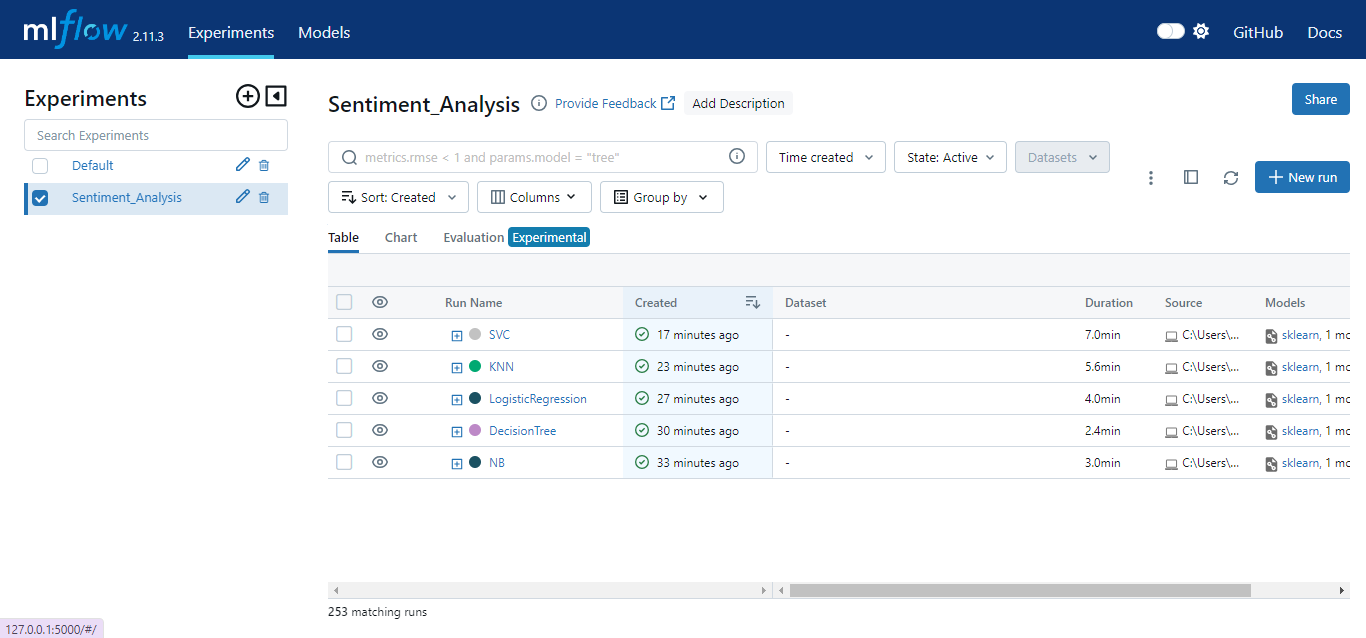

In [45]:
Image('screen/ui run name.png')

<h2><b>Demonstrate metric plots</b></h2>

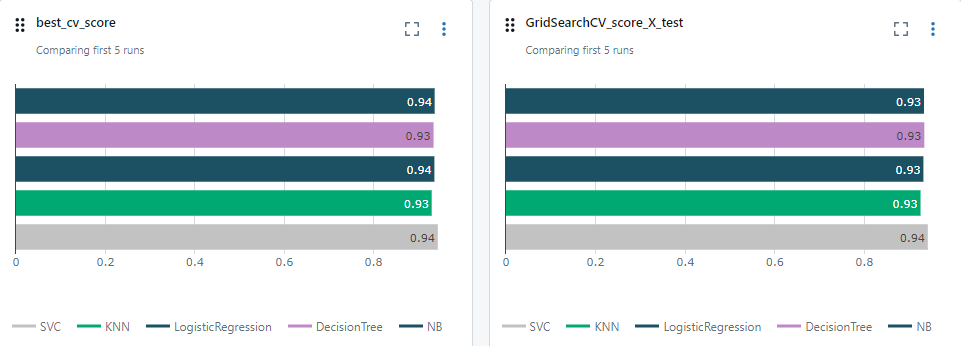

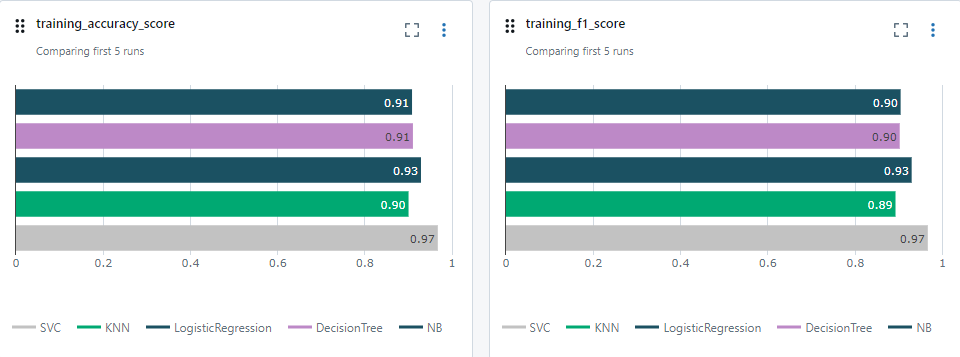

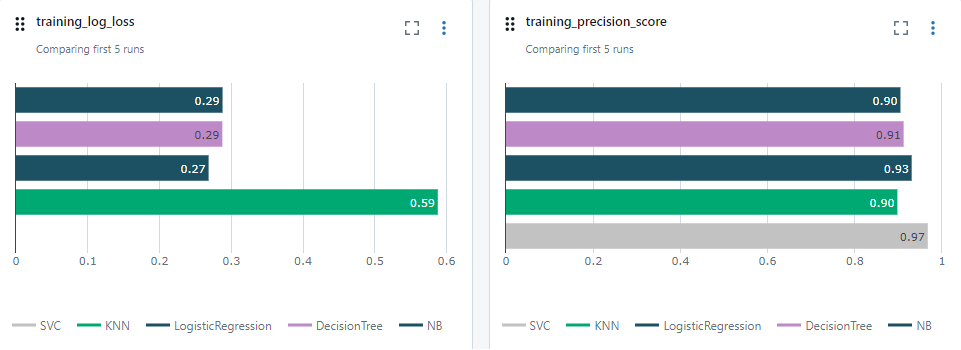

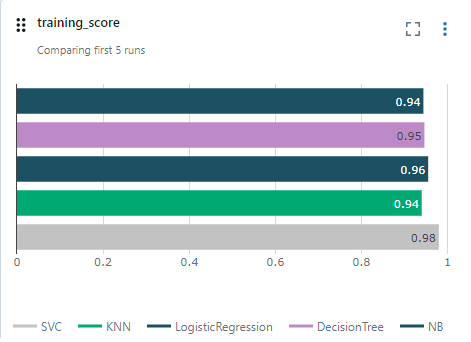

In [3]:
from IPython.display import display, Image

# Display the first image
display(Image('screen/best_cv_score.png'))

# Display the second image
display(Image('screen/training_accuracy_score.png'))

# Display the third image
display(Image('screen/training_log_loss.png'))

# Display the fourth image
display(Image('screen/training_score.png'))


<h2><b>Demonstrate hyperparameter plots</b></h2>

<h3><b>Naive Bayes</b></h3>

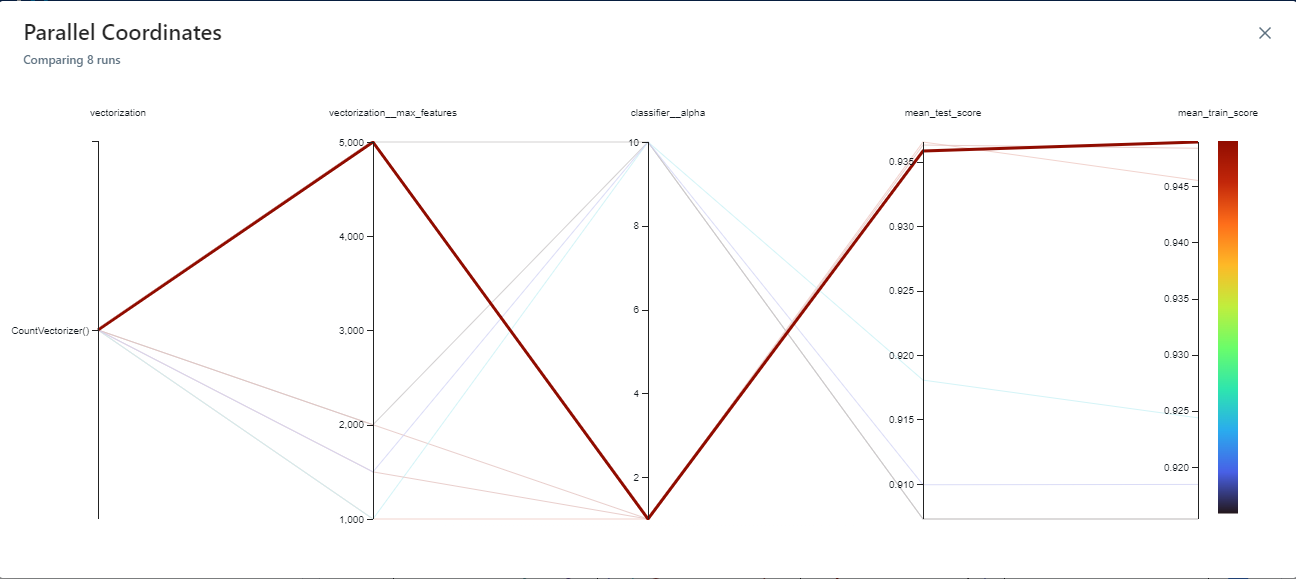

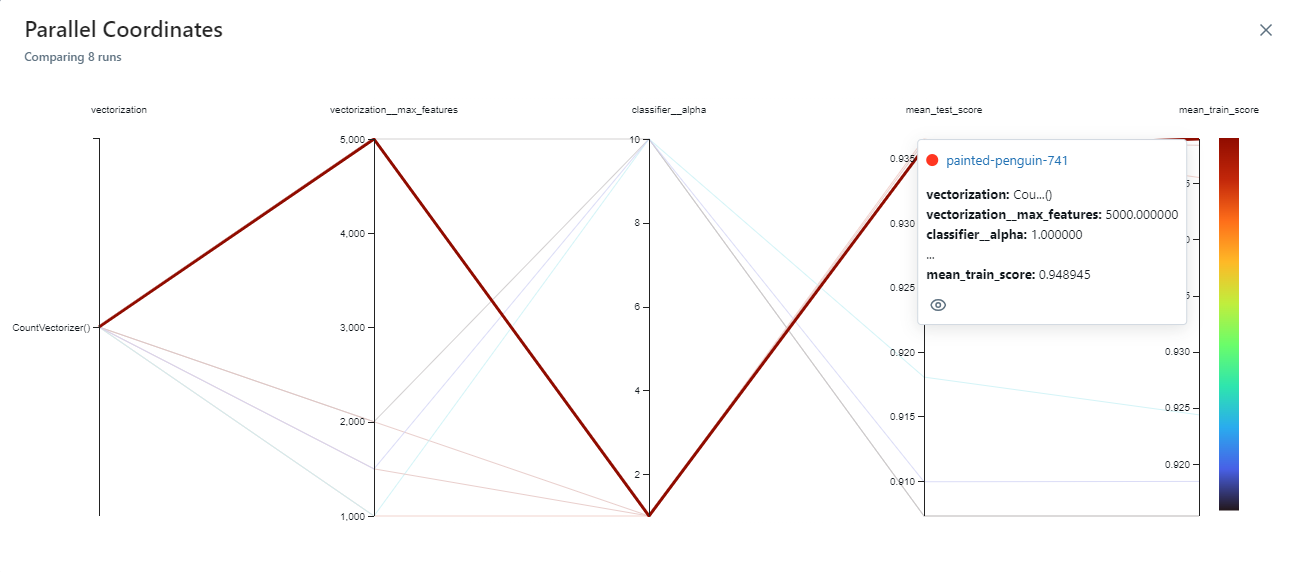

In [5]:
# Display the first image
display(Image('screen/nb/nb1.png'))

# Display the second image
display(Image('screen/nb/nb2.png'))

<h3><b>Decision Tree</b></h3>

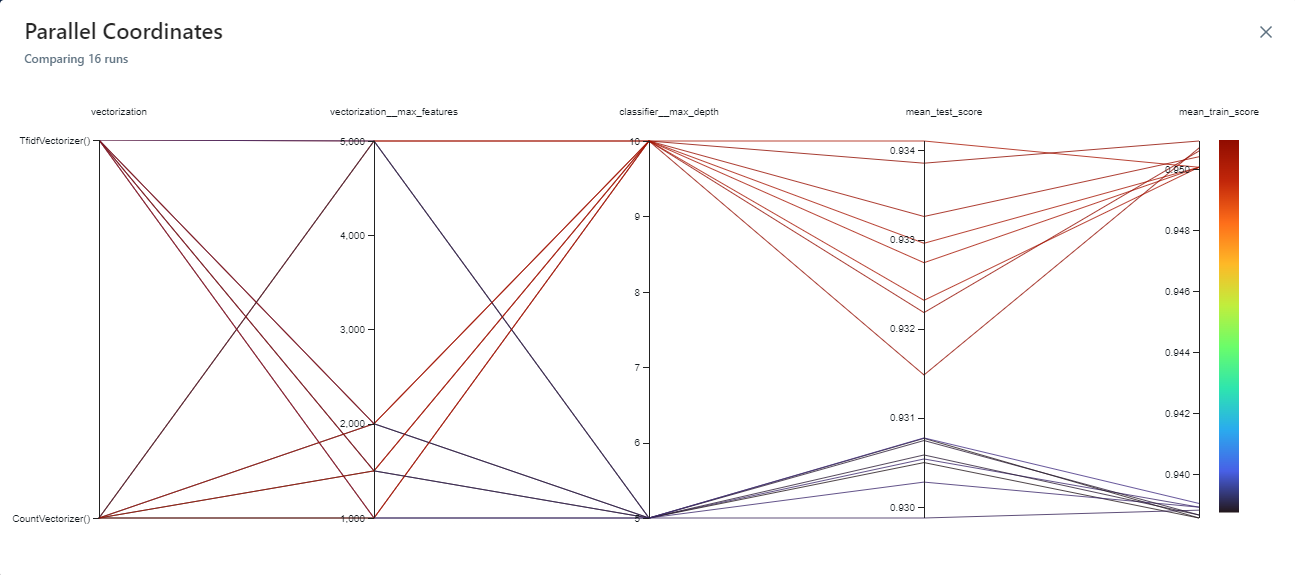

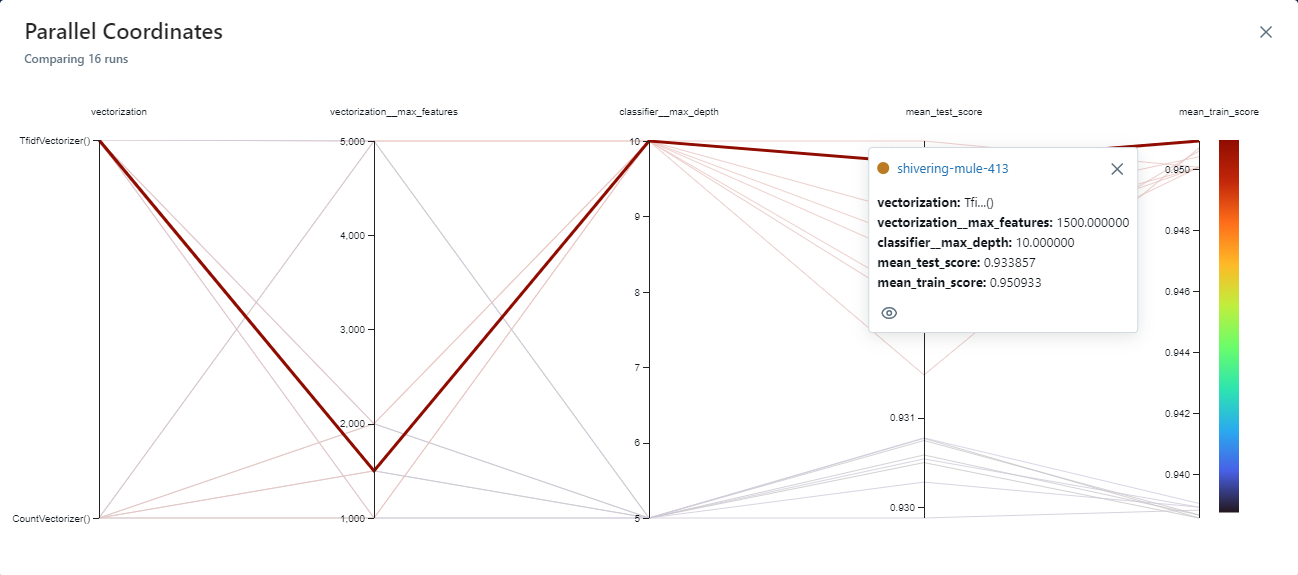

In [6]:
# Display the first image
display(Image('screen/dt/dt1.png'))

# Display the second image
display(Image('screen/dt/dt2.png'))

<h3><b>Logistic Regression</b></h3>

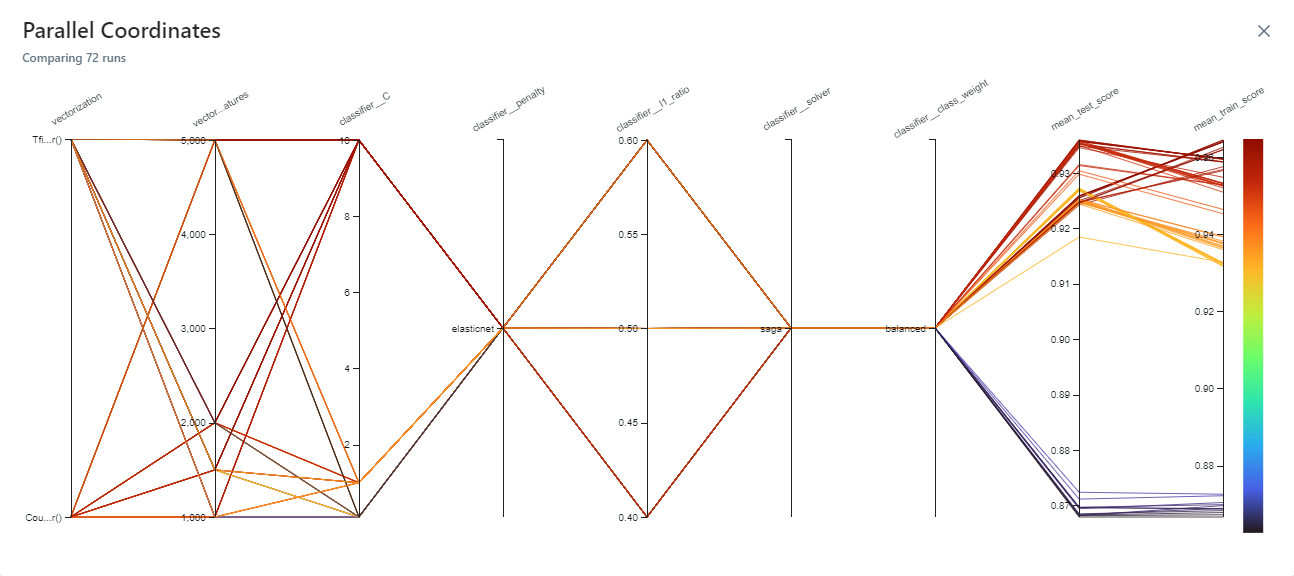

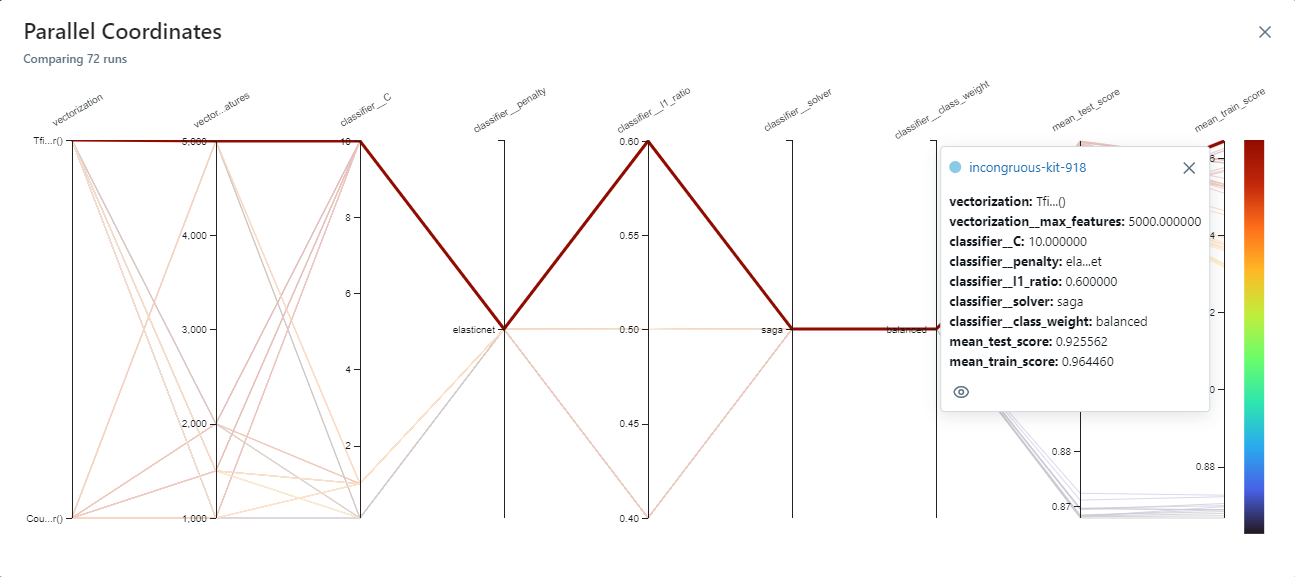

In [8]:
# Display the first image
display(Image('screen/lr/lr.png'))

# Display the second image
display(Image('screen/lr/lr2.png'))

<h3><b>K-Nearest Neighbors</b></h3>

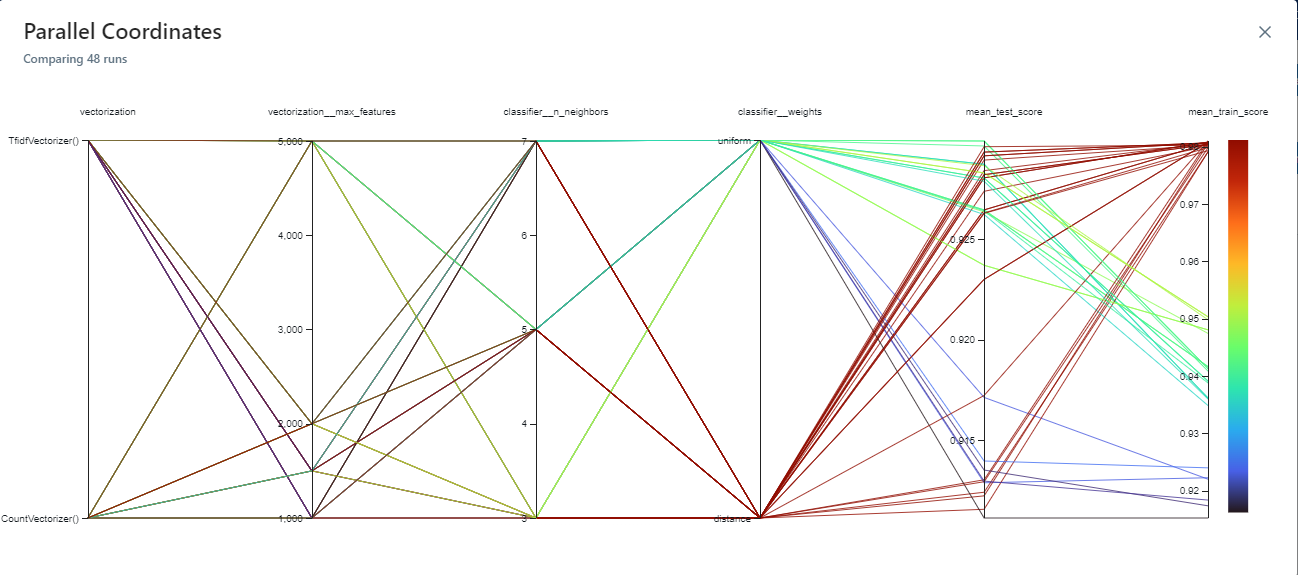

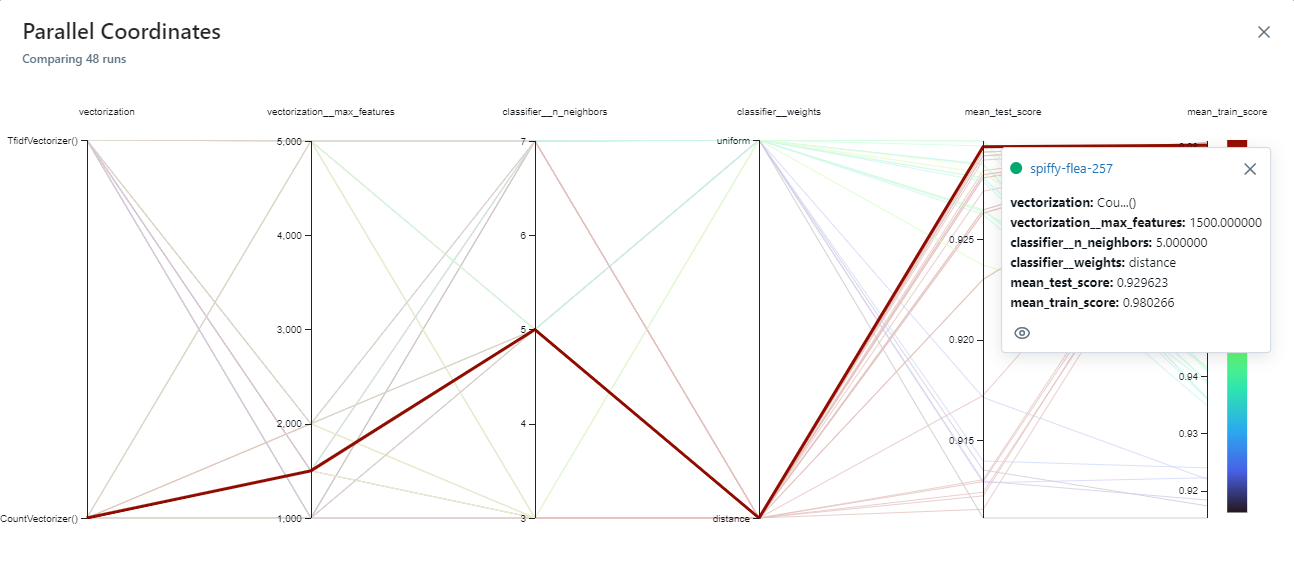

In [9]:
# Display the first image
display(Image('screen/knn/knn1.png'))

# Display the second image
display(Image('screen/knn/knn2.png'))

<h3><b>Support Vector Classifier</b></h3>

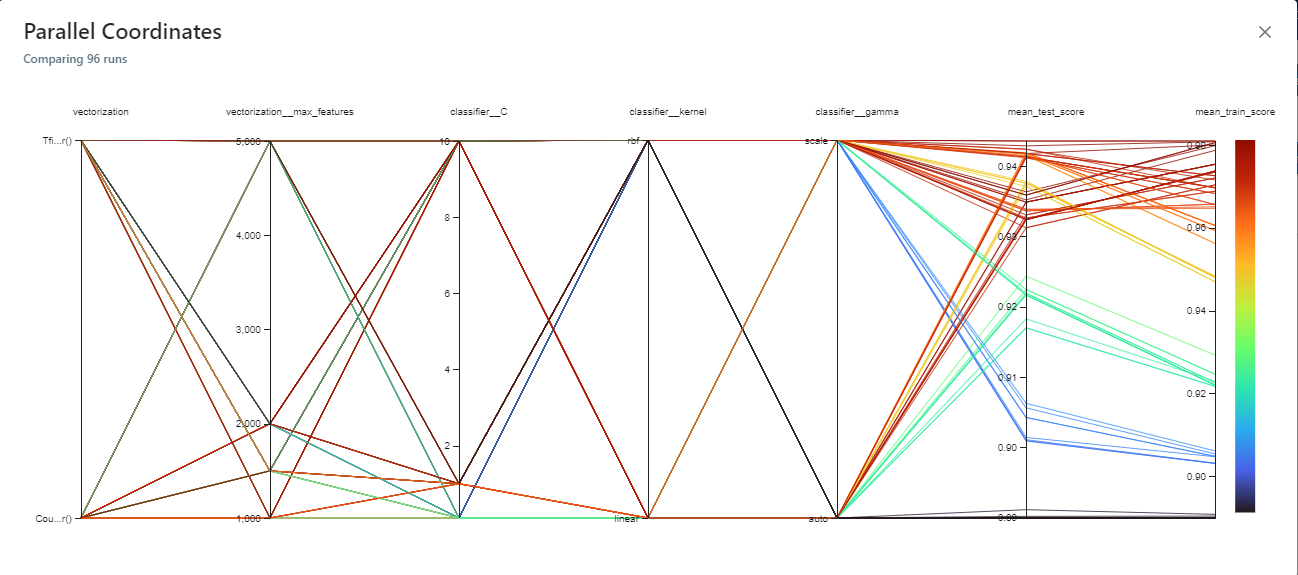

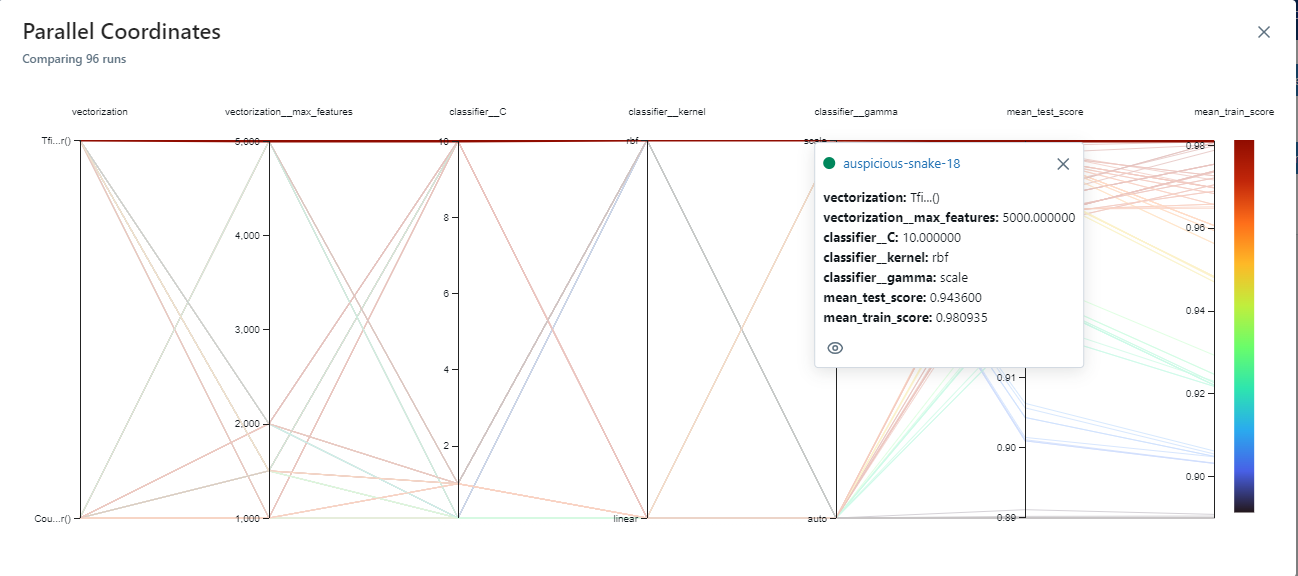

In [10]:
# Display the first image
display(Image('screen/svc/svc1.png'))

# Display the second image
display(Image('screen/svc/svc2.png'))

<h2><b>Demonstrate how to register models and manage by tagging them</b></h2>

<h3><b>How to Register a Model</b></h3>

- <b>Selecting a Run and Registering a Model</b><br>
When selecting a specific run within MLFlow, hover over the "REGISTER MODEL" option. If a model has already been registered, the system will display the existing registered model. If there are no registered models associated with the selected run, the interface will indicate "0 out of 2 logged models are registered

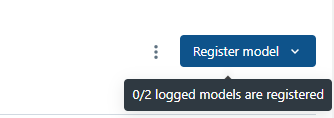

In [13]:
Image('screen/register/register model.png')

- <b>Registering a Model when None is Currently Registered</b><br>
In the event that no model is currently registered, proceed by clicking the dropdown menu.

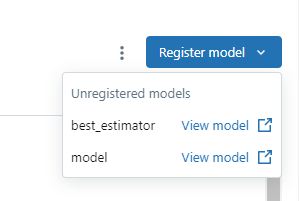

In [14]:
Image('screen/register/best model.png')

- <b>Registering the Model "best_estimator"</b><br>
After selecting the "best_estimator" option, initiate the registration process by clicking on "Register Model". This action triggers the appearance of the "Register Model" window, facilitating the creation of a new model.

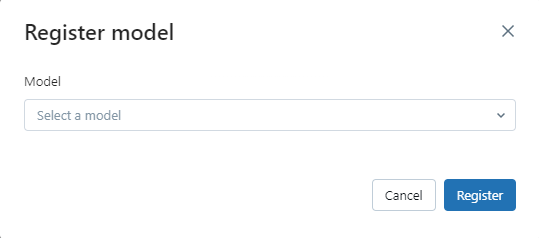

In [15]:
Image('screen/register/register model screen.png')

- <b>Selecting a Model from the Dropdown or Creating a New Model</b><br>
Upon clicking the dropdown menu, existing models will be displayed if available. Alternatively, if no models are currently present, the option to "Create New Model" will be provided.

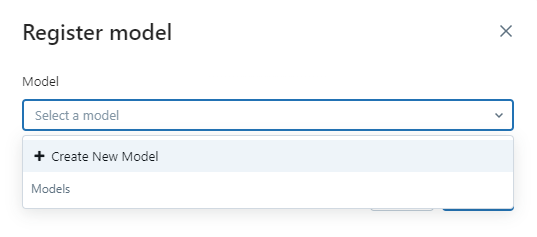

In [17]:
Image('screen/register/create new model.png')

- <b>Initiating Model Creation and Adding Model Name</b><br>
Proceed by selecting "Create New Model", followed by inputting the desired model name.

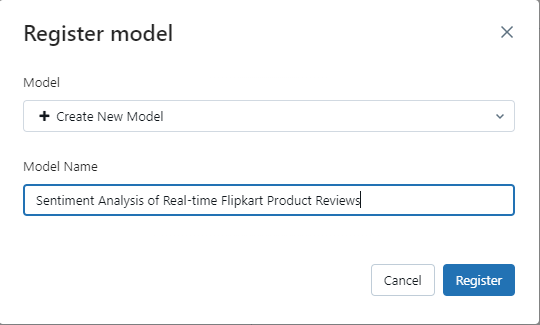

In [18]:
Image('screen/register/add model name.png')

- <b>Finalizing Registration</b><br>
Conclude the registration process by clicking on the "Register" button.

- <b>Verifying Model Registration</b><br>
To confirm whether the model has been successfully registered, navigate to the MLFlow home page and select the "Model" tab.

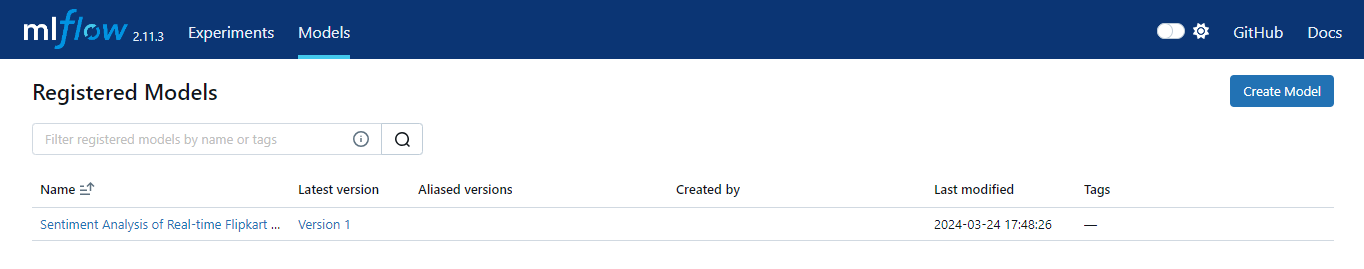

In [20]:
Image('screen/register/model created.png')

- <b>Observing Version Number</b><br>
Since only one model has been added, the latest version will be denoted as "Version 1".

- <b>Including Additional Run Models</b><br>
Proceed by adding the remaining run models to the system.

- <b>Selecting a Run Model for Registration</b><br>
To register the remaining models in the "Register Model" interface, locate the desired run model (e.g., "KNN") and click on it.

- <b>Initiating Model Registration for the KNN Run</b><br>
Select the KNN run name, then navigate to the right side of the interface and proceed by clicking on "Register Model" followed by selecting "best_estimator".

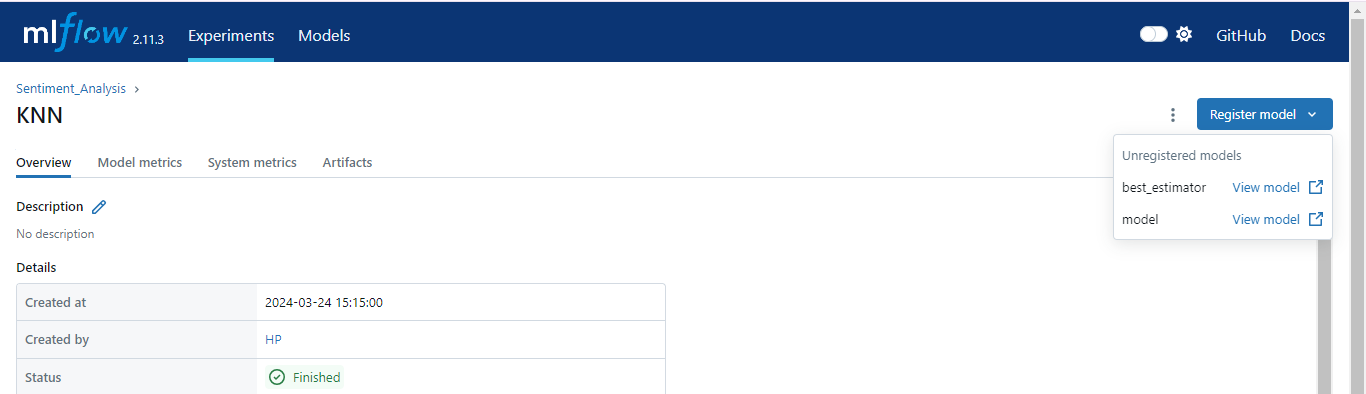

In [23]:
Image('screen/register/adding more models/knn.png')

- <b>Viewing Previously Registered Models</b><br>
Upon opening the "Register Model" screen, if a model named "Sentiment Analysis of Real-time Flipkart Product Reviews" has already been registered, it will be displayed in the dropdown menu.

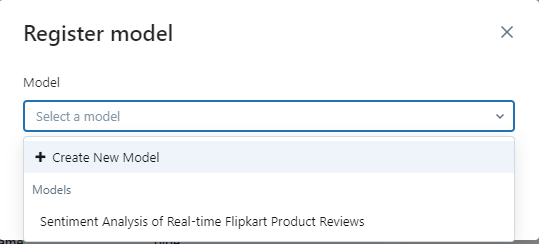

In [25]:
Image('screen/register/adding more models/knn added in register model.png')

- <b>Selecting the Registered Model and Finalizing Registration</b><br>
Proceed by selecting the registered model from the dropdown menu, then click on the "Register" button to complete the registration process.

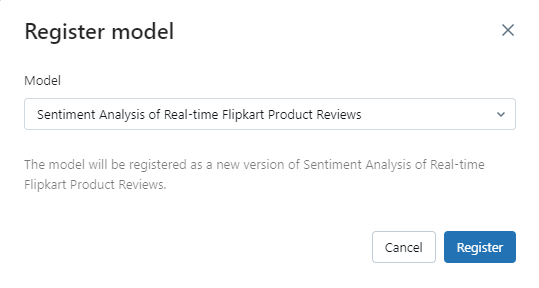

In [26]:
Image('screen/register/adding more models/model.png')

- <b>Replicating the Process for All Run Models</b><br>
Repeat the aforementioned steps for all available run models listed on the Experiment Page.

- <b>Accessing the "Model" Page</b><br>
After completing the registration of all models, navigate to the "Model" page.

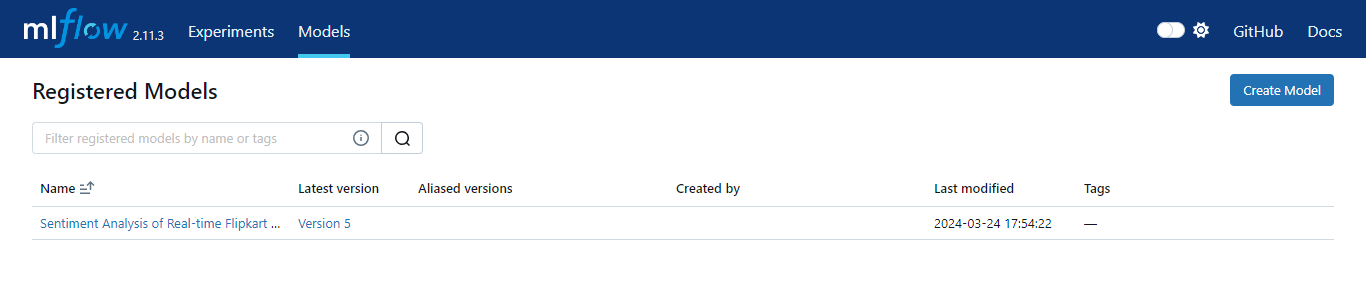

In [29]:
Image('screen/register/model screen/model page.png')

- <b>Interpreting Version Numbers</b><br>
In this context, when the version number is indicated as "Version 5," it signifies that there are a total of five model runs.

- <b>Selecting a Model Name</b><br>
Navigate to the name labeled "Sentiment Analysis of Real-time Flipkart Product Reviews". This action will enable us to access all available versions associated with this model.

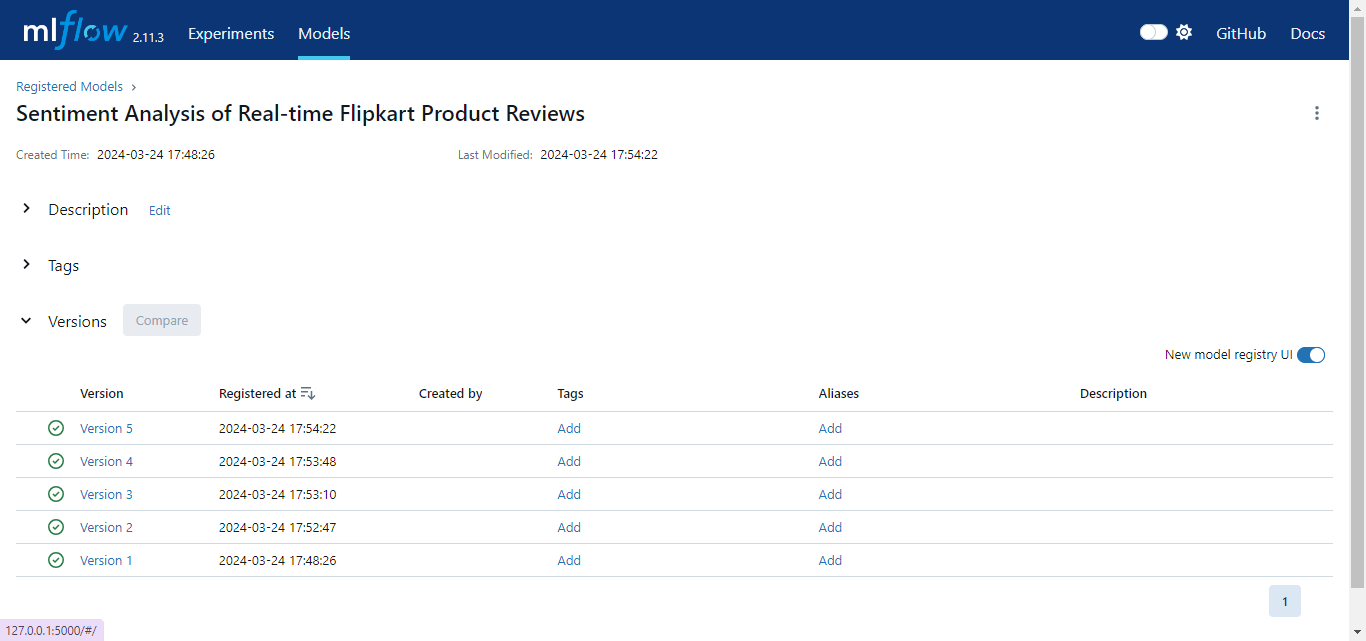

In [30]:
Image('screen/register/model screen/all models.png')

- <b>Identifying Model Run Names</b><br>
To associate model versions with their respective run names in MLFlow, follow these steps: Click on any version, then on the right side, locate the "Source Run" option. This allows us to verify the model name linked to that specific version.

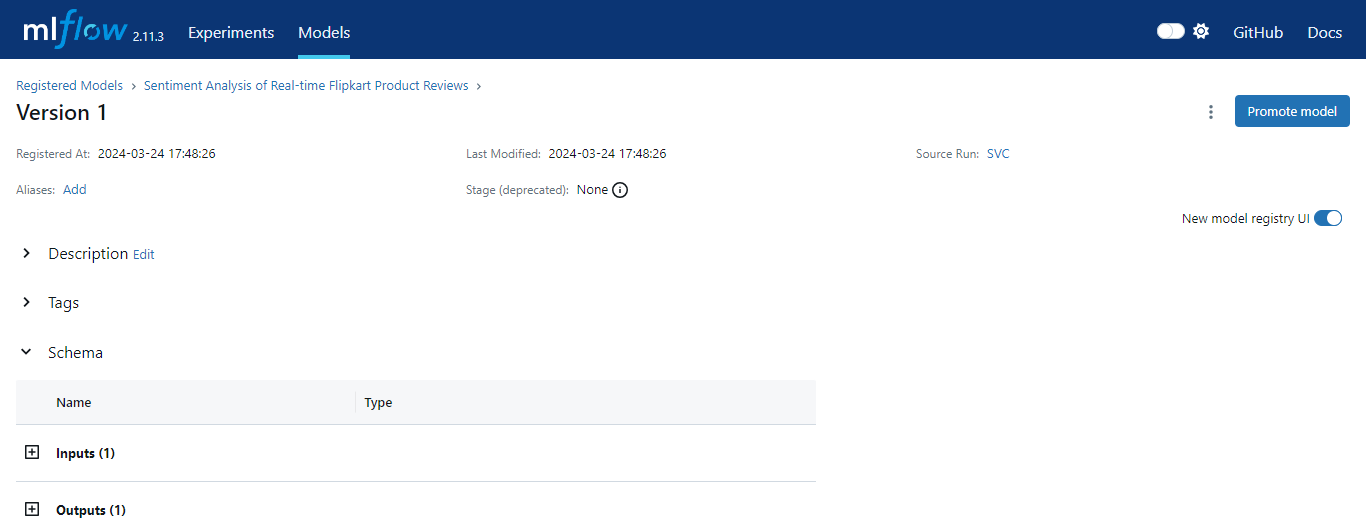

In [31]:
Image('screen/register/model screen/model version name.png')

<h3><b>Model Tagging</b></h3>

- <b>Evaluating Model Performance for Tagging</b><br>
Before proceeding with model tagging, it is imperative to assess the model's performance based on its test and train scores.

- <b>Evaluating Test and Train Scores in Experiment Summary</b><br>
To assess the test and train scores of each model, navigate to the Experiment name and utilize the "Columns" options to select the relevant metrics. This enables the comparison of test and train scores across models, facilitating the selection of the most suitable model for deployment in the "Production" environment.

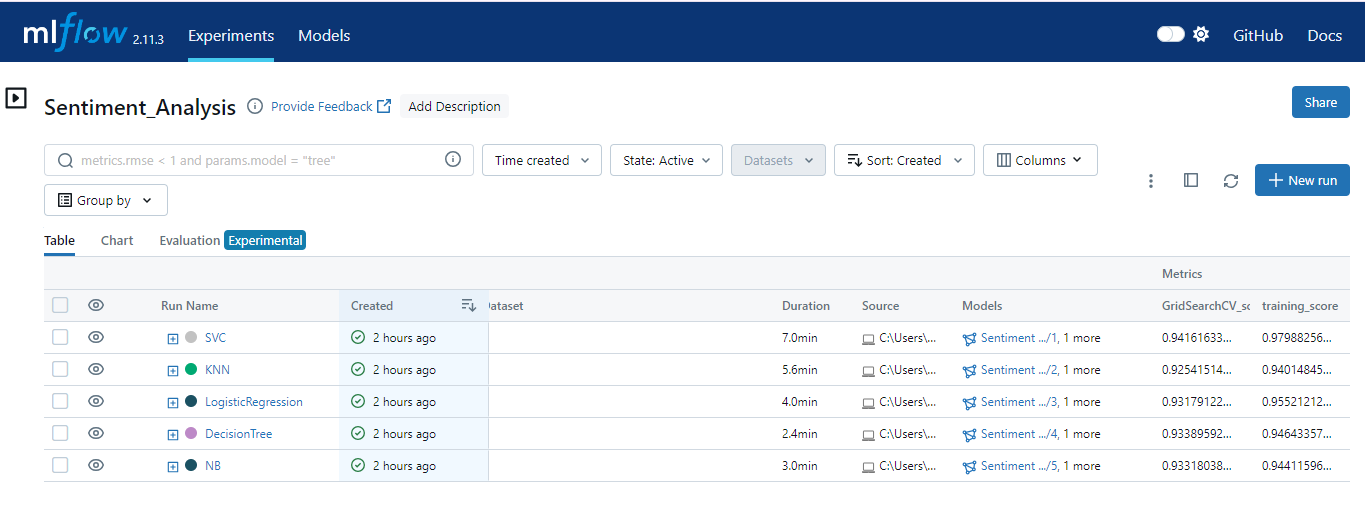

In [32]:
Image('screen/best model/test & train score.png')

- <b>Identifying a Promising Model</b><br>
After reviewing the metrics, the Support Vector Classifier (SVC) emerges as a favorable model candidate.

- <b>Accessing the "Production" Tagging Option</b><br>
To tag a model as "Production," navigate to the "Model" page.

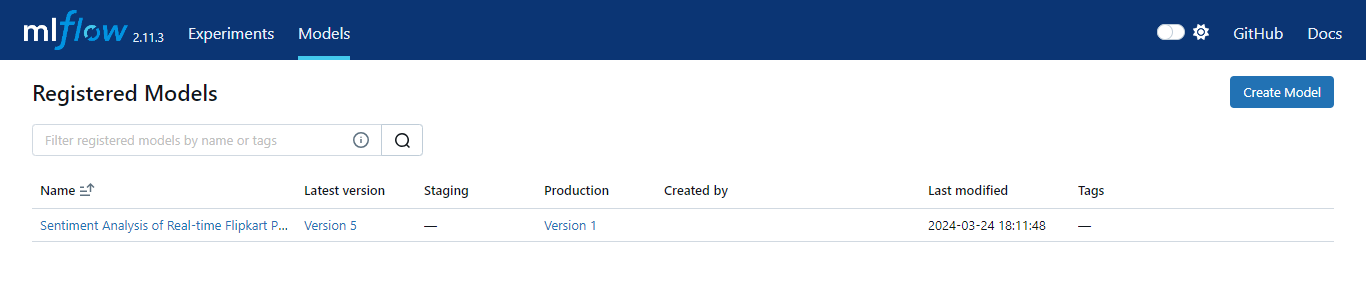

In [34]:
Image('screen/best model/best model.png')

- <b>Selecting the Model Name</b><br>
Locate and click on the name labeled "Sentiment Analysis of Real-time Flipkart Product Reviews."

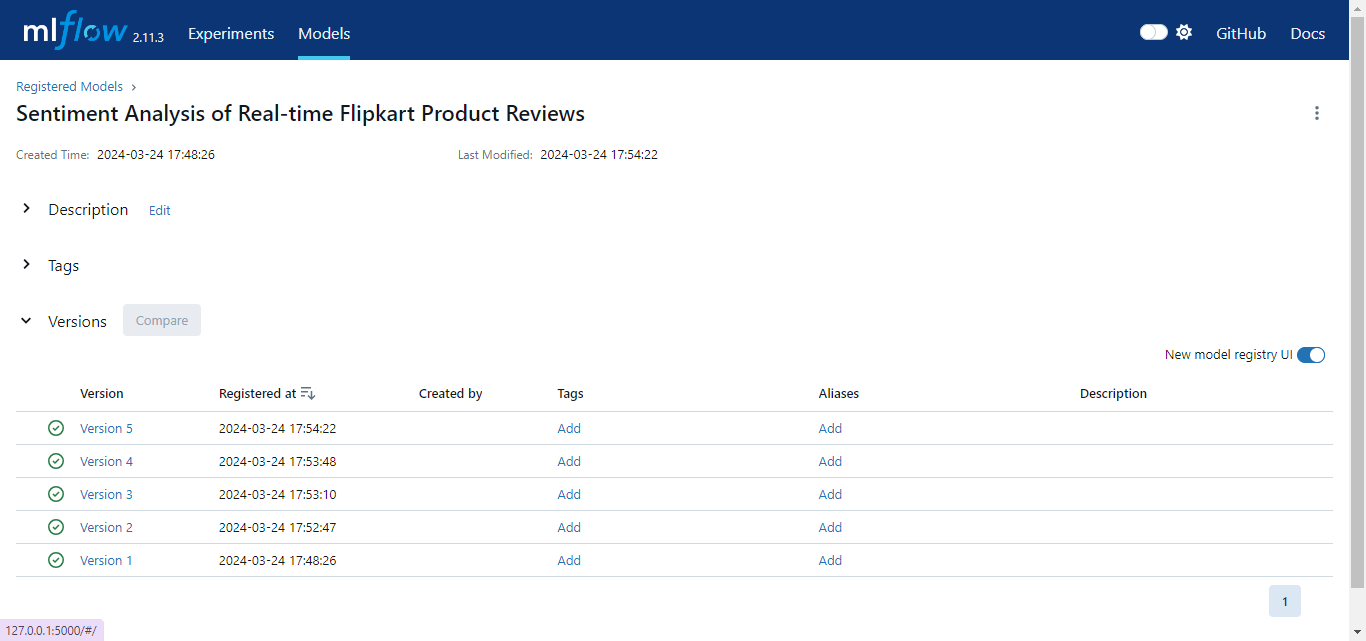

In [35]:
Image('screen/register/model screen/all models.png')

- <b>Choosing the Preferred Version</b><br>
Identify the version that meets the criteria for being the best version. In this project, "Version 1" has been determined as the optimal version. Proceed by selecting "Version 1."

- <b>Setting Stage to "Production"</b><br>
Select the stage option and designate it as "Production."

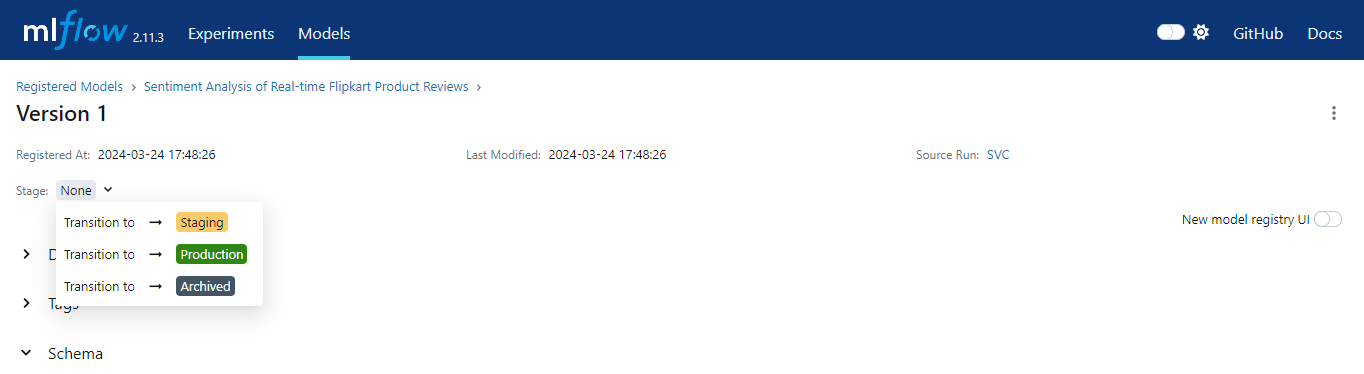

In [36]:
Image('screen/best model/ver1.png')

- <b>Archiving Previous Versions</b><br>
Upon updating the version for production, the previous version_model will be automatically tagged as "Archived." Refer to the screen below for clarification.

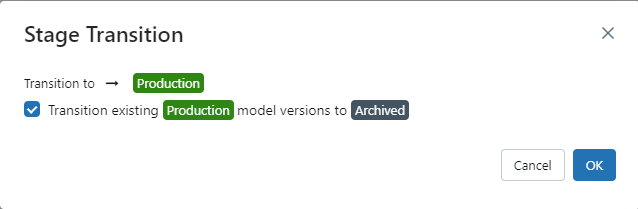

In [38]:
Image('screen/best model/information.png')

- <b>Verifying Production Version</b><br>
To confirm which version is presently designated for "Production," refer to the Model Screen.

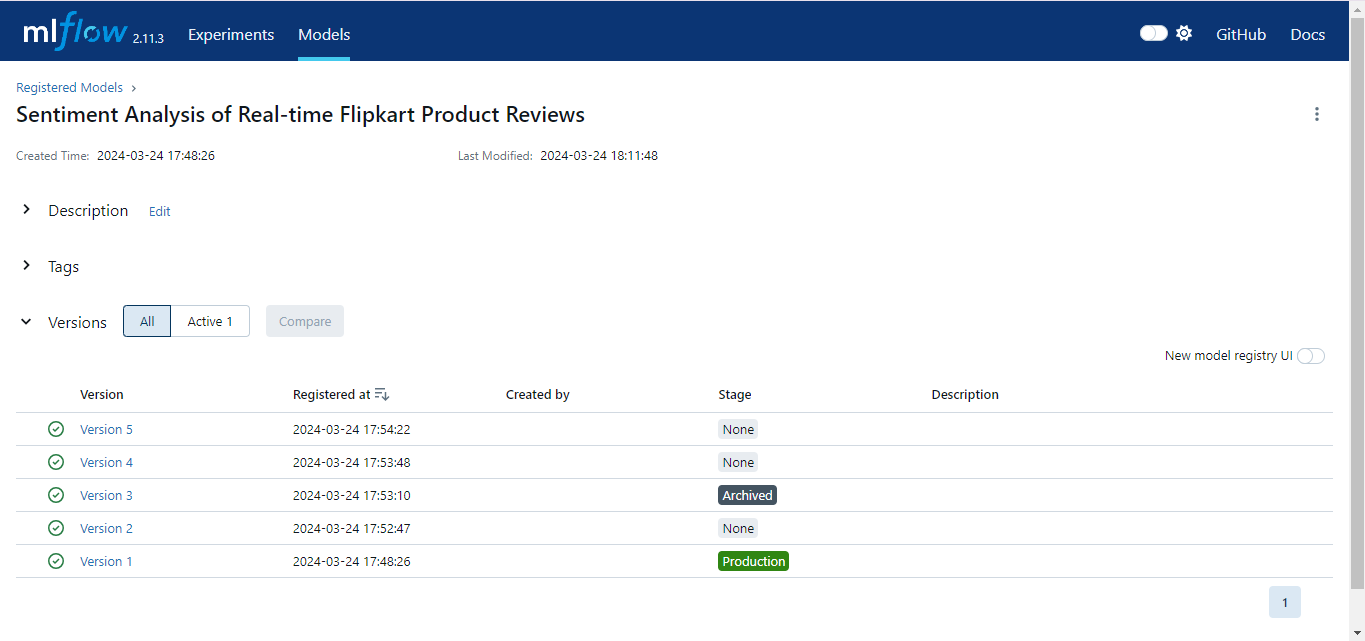

In [39]:
Image('screen/best model/model page.png')